In [16]:
import matplotlib.pyplot as plt
import tensorflow.keras.losses as losses
import numpy as np


In [1]:
%run main.py --u

/home/cara/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-22 07:39:16.348650: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 07:39:16.751509: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 07:39:16.752865: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 07:39:18.603887: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Shuffling Dataset

Splitting Dataset

Processing training images



100%|██████████| 624/624 [00:09<00:00, 66.56it/s]



Processing validation images




100%|██████████| 78/78 [00:01<00:00, 64.27it/s]




Processing testing images



100%|██████████| 858/858 [00:12<00:00, 67.97it/s]




Training AE model


2023-04-22 07:39:45.646218: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


UPAE
Decoder
Epoch 1/250
20/20 [==============================] - ETA: 0s - loss: 5587.7363 - mse: 5587.7363 - accuracy: 0.2649 - AUC: 0.4870 - Precision: 0.9999 - Recall: 0.9026 - True Positives: 6920250.0000 - False Positives: 596.0000

2023-04-22 07:40:18.525206: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 251658240 exceeds 10% of free system memory.
2023-04-22 07:40:18.954171: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2013265920 exceeds 10% of free system memory.
2023-04-22 07:40:23.043665: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2013265920 exceeds 10% of free system memory.
2023-04-22 07:40:25.239689: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 251658240 exceeds 10% of free system memory.


20/20 [==============================] - 39s 2s/step - loss: 5587.7363 - mse: 5587.7363 - accuracy: 0.2649 - AUC: 0.4870 - Precision: 0.9999 - Recall: 0.9026 - True Positives: 6920250.0000 - False Positives: 596.0000 - val_loss: 426204135424.0000 - val_mse: 426204135424.0000 - val_accuracy: 0.3440 - val_AUC: 0.5000 - val_Precision: 0.9999 - val_Recall: 1.0000 - val_True Positives: 958364.0000 - val_False Positives: 100.0000
Epoch 2/250
20/20 [==============================] - ETA: 0s - loss: 2586.8838 - mse: 2586.8838 - accuracy: 0.3108 - AUC: 0.4999 - Precision: 0.9999 - Recall: 0.9999 - True Positives: 7666073.0000 - False Positives: 644.0000

2023-04-22 07:40:52.205503: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 251658240 exceeds 10% of free system memory.


20/20 [==============================] - 31s 2s/step - loss: 2586.8838 - mse: 2586.8838 - accuracy: 0.3108 - AUC: 0.4999 - Precision: 0.9999 - Recall: 0.9999 - True Positives: 7666073.0000 - False Positives: 644.0000 - val_loss: 6643412992.0000 - val_mse: 6643412992.0000 - val_accuracy: 0.5391 - val_AUC: 0.5000 - val_Precision: 0.9999 - val_Recall: 1.0000 - val_True Positives: 958364.0000 - val_False Positives: 100.0000
Epoch 3/250
20/20 [==============================] - 32s 2s/step - loss: 2068.9106 - mse: 2068.9106 - accuracy: 0.6598 - AUC: 0.5000 - Precision: 0.9999 - Recall: 1.0000 - True Positives: 7667068.0000 - False Positives: 644.0000 - val_loss: 66212228.0000 - val_mse: 66212228.0000 - val_accuracy: 0.8502 - val_AUC: 0.4999 - val_Precision: 0.9999 - val_Recall: 0.9998 - val_True Positives: 958216.0000 - val_False Positives: 100.0000
Epoch 4/250
20/20 [==============================] - 31s 2s/step - loss: 1770.5060 - mse: 1770.5060 - accuracy: 0.9098 - AUC: 0.5000 - Precision

In [ ]:
#tensorboard will show trends in precision, recall, etc per epochs
#tensorboard to be opened in a browser using link 
%load_ext tensorboard
%tensorboard --logdir logs/fit

## Testing

In [34]:
#testing using testing set
input_images=image_datasets[2] 
vae.autoencoder.predict(input_images)
generated = np.array(generated)

27/27 [==============================] - 8s 308ms/step


In [18]:
#getting mean reconstruction error score for the images tested
re_score = losses.mean_squared_error(input_image, generated)
re_score = np.mean(re_score)
print("reconstruction error score:", re_score)

reconstruction error score: 1064.3633


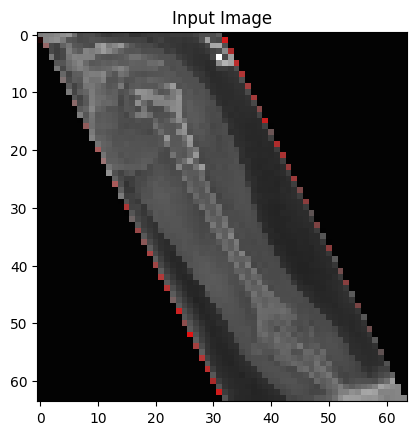

In [44]:
#input image
plt.imshow(image_datasets[2][0])
plt.title("Input Image")
plt.show()

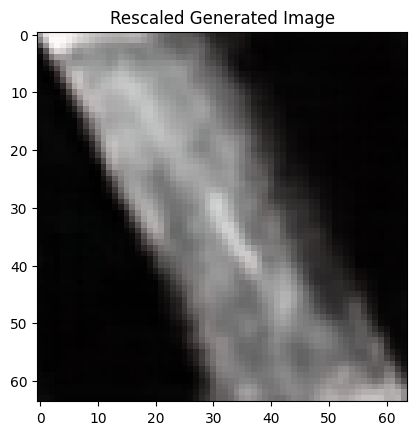

In [45]:
#rescaled generated image
generated_rescaled = (generated[0] - generated[0].min()) / (generated[0].max() - generated[0].min())
plt.imshow(generated_rescaled.reshape(64,64,3))
plt.title("Rescaled Generated Image")
plt.show()

In [48]:
#reconstruction error without Uncertainty Prediciton Score
#for the sample image above
re_score = losses.mean_squared_error(image_datasets[2][0], generated_rescaled )
re_score = np.mean(re_score)
print("RE without UP:", re_score)

RE without UP: 3220.3682


In [ ]:
#reconstruction error with Uncertainty Prediciton Score
